# Notebook dedicated to develop graphical visuals to compare real data with mc data used to train the ML model

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sn

# Import Data

In [96]:
#Choose the real dataset based on the cuts on energy ans position
en_inf_cut = 3.5
en_sup_cut = 12
posr_cut = 5000


real_data_dir = f'C:/Users/joanc/jupyter notebooks/solar neutrino analysis/real data analysis/real_dataset_ML/real_dataset_E_{en_inf_cut}_{en_sup_cut}_MeV_R_{posr_cut}_mm.csv'
mc_data_dir = 'C:/Users/joanc/jupyter notebooks/solar neutrino analysis/Machine Learning/Data/High Stat/Elegant Data Frame Structure/train/df1_5500_10_(2.5_14)_(-5_7).csv'

df_real_data = pd.read_csv(real_data_dir)
df_mc_data = pd.read_csv(mc_data_dir)

In [97]:
df_real_data.head()

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_92,pixel_93,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99,energy (MeV),radius (mm)
0,0,0.0,0.00,0.0,0.2,0.000000,0.10,0.058824,0.131579,0.148148,...,0.000000,0.200000,0.111111,0.000000,0.000000,0.105263,0.037037,0.133333,4.044874,2425.253906
1,1,0.0,0.25,0.0,0.0,0.117647,0.00,0.000000,0.076923,0.107143,...,0.125000,0.000000,0.117647,0.153846,0.160000,0.076923,0.178571,0.068966,3.546911,3926.669922
2,2,0.0,0.00,0.0,0.2,0.083333,0.25,0.000000,0.000000,0.000000,...,0.142857,0.200000,0.166667,0.250000,0.166667,0.090909,0.000000,0.034483,3.584208,1686.395874
3,3,0.0,0.00,0.0,0.0,0.076923,0.00,0.000000,0.080000,0.000000,...,0.142857,0.111111,0.230769,0.238095,0.058824,0.240000,0.178571,0.193548,4.000314,3871.861816
4,4,0.0,0.00,0.0,0.0,0.000000,0.05,0.000000,0.000000,0.023256,...,0.090909,0.125000,0.277778,0.150000,0.178571,0.111111,0.232558,0.189189,4.135279,3998.809082


In [98]:
df_mc_data.head()

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_94,pixel_95,pixel_96,pixel_97,pixel_98,pixel_99,energy (MeV),radius (mm),IsNu,IsTl
0,0,0.0,0.000000,0.000000,0.214286,0.142857,0.166667,0.175000,0.116279,0.129032,...,0.0,0.000000,0.025000,0.000000,0.032258,0.057692,4.140509,4953.780762,1,0
1,1,0.5,0.666667,0.375000,0.400000,0.375000,0.200000,0.333333,0.228571,0.292683,...,0.0,0.033333,0.000000,0.000000,0.048780,0.000000,5.148627,4351.215332,1,0
2,2,0.0,0.000000,0.333333,0.000000,0.000000,0.076923,0.131579,0.114286,0.027778,...,0.0,0.000000,0.026316,0.000000,0.111111,0.088235,3.048888,5376.318359,1,0
3,3,0.0,0.000000,0.000000,0.000000,0.000000,0.033333,0.052632,0.068966,0.043478,...,0.5,0.100000,0.236842,0.103448,0.108696,0.132075,4.978830,3364.814941,1,0
4,4,0.0,0.000000,0.000000,0.000000,0.090909,0.266667,0.097561,0.152542,0.142857,...,0.0,0.000000,0.048780,0.033898,0.020408,0.038462,5.437078,2957.884521,1,0


# Extract Data

In [99]:
# Real Data
energy = np.array(df_real_data['energy (MeV)'])
radius = np.array(df_real_data['radius (mm)'])

#MC Data
energy_mc = np.array(df_mc_data['energy (MeV)'])
radius_mc = np.array(df_mc_data['radius (mm)'])

#cut on radius
#posr_cut = 5500
#posr_condition = (radius <= posr_cut)

#energy = energy[posr_condition]

In [100]:
energy.shape

(136,)

# Plots - Compare Real Data with Montecarlo

### Plots Settings

In [109]:
#Define her the cuts applied to the shown data!
#Data Cuts:
energy_inf_cut = en_inf_cut
energy_sup_cut = en_sup_cut

#time_res_inf_cut = -5.0
#time_res_sup_cut = 7.0

posr_cut = posr_cut

dcFlag_cut = 0x2100000042C2

#Title settings -----------------------------------------------

energy_cut_title = rf'Energy cut: [{energy_inf_cut}, {energy_sup_cut}] (MeV) '
posr_cut_title = rf'R $\leq$ {posr_cut} (mm) '
dcFlag_cut_title = rf'mask = {hex(dcFlag_cut)} '

#Save settings ------------------------------------------------
save = True
save_dir = 'figs/Real Data vs MC/'
# Binning settings ---------------------------------------------

binwidth = 1.15

# Define los bordes de los bins usando el ancho de bin
min_edge = np.min(energy)
max_edge = np.max(energy)
bins = np.arange(min_edge, max_edge + binwidth, binwidth)


energy_real_counts, bin_edges = np.histogram(energy, bins = bins, density = True)
bins_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
bins_in_mc = np.linspace(min(energy_mc), max(energy_mc), len(energy_real_counts))

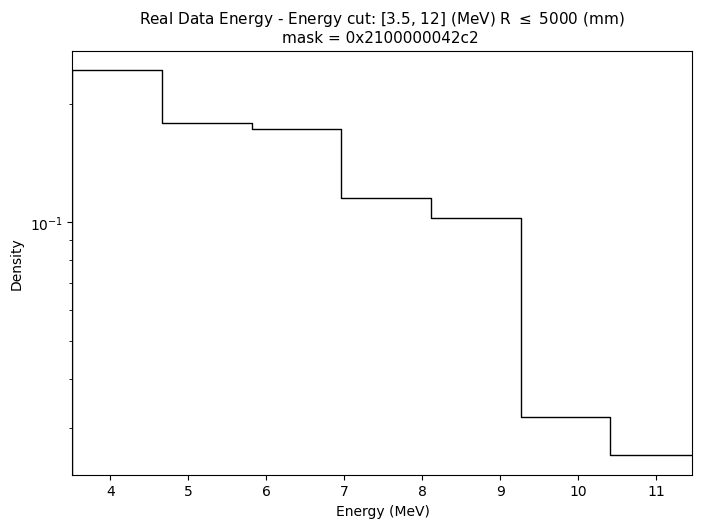

In [110]:
plt.figure(figsize = (8,5.5))

sn.histplot(energy, bins = bins, stat = 'density', element = 'step', alpha = 0, color = 'black')

plt.xlabel('Energy (MeV)')
plt.title('Real Data Energy - ' + energy_cut_title + posr_cut_title + '\n' + dcFlag_cut_title, fontsize = 11)

plt.xlim(min(energy), max(energy))
plt.yscale('log')

### Style 1 Data vs MC

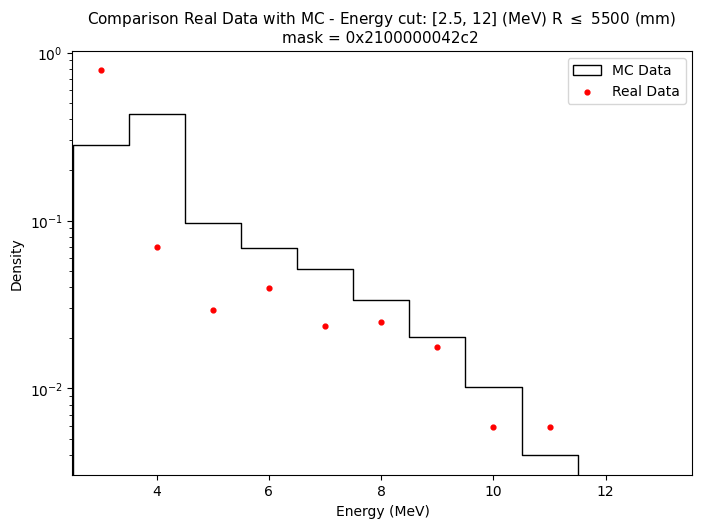

In [14]:
plt.figure(figsize = (8,5.5))

sn.histplot(energy_mc, bins = bin_edges, stat = 'density', element = 'step', alpha = 0, color = 'black', label = 'MC Data')
plt.scatter(bins_center, energy_real_counts, label = 'Real Data', color = 'r', s = 12)

plt.xlabel('Energy (MeV)')
plt.title('Comparison Real Data with MC - ' + energy_cut_title + posr_cut_title + '\n' + dcFlag_cut_title, fontsize = 11)

plt.xlim(min(energy_mc), max(energy_mc))

plt.legend(loc='best')

plt.yscale('log')

plt.show()

### Style 2 Data vs MC

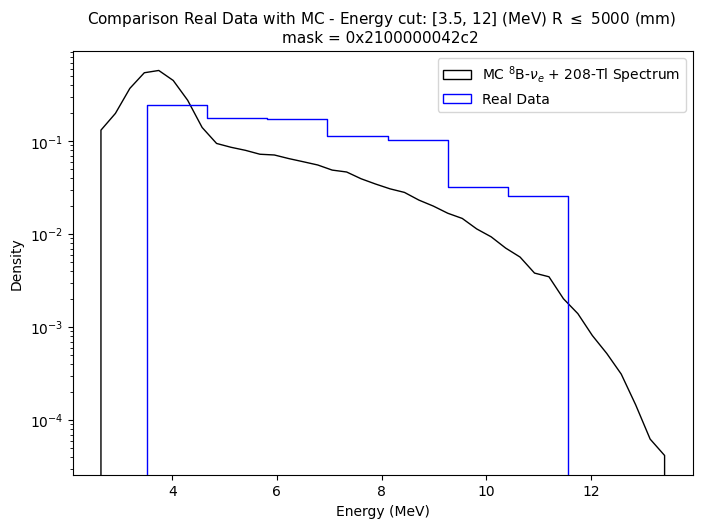

In [111]:
binwidth_energy = 1.2

plt.figure(figsize = (8,5.5))

sn.histplot(energy_mc, bins = 40, stat = 'density', element = 'poly', alpha = 0, color = 'black', label = r'MC $^8$B-$\nu_e$ + 208-Tl Spectrum')
sn.histplot(energy, bins = bins, stat = 'density', element = 'step', alpha = 0, color = 'blue', label = 'Real Data')

plt.xlabel('Energy (MeV)')
plt.title('Comparison Real Data with MC - ' + energy_cut_title + posr_cut_title + '\n' + dcFlag_cut_title, fontsize = 11)

#plt.xlim(min(energy_mc), max(energy_mc))

plt.legend(loc='best')

plt.yscale('log')

if save:
    plt.savefig(f'{save_dir}mc_vs_real_energy_distribution_E_{energy_inf_cut}_{energy_sup_cut}MeV_R_{posr_cut}mm.png', format = 'png', bbox_inches = 'tight')

plt.show()